In [17]:
import pandas as pd
import sklearn.preprocessing as preproc 
import matplotlib.pyplot as plt

news_df = pd.read_csv("/Users/ktxdev/Documents/Data/online_news_popularity.csv")

news_df[' n_tokens_content'].to_numpy()

array([219., 255., 211., ..., 442., 682., 157.])

## Min-Max Scaling

In [18]:
news_df['min_max'] = preproc.minmax_scale(news_df[[' n_tokens_content']])
news_df['min_max'].to_numpy()

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

## Standardization

In [19]:
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[[' n_tokens_content']])
news_df['standardized'].to_numpy()

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

## L2-Normalization

In [20]:
news_df['l2_normalized'] = preproc.normalize(news_df[[' n_tokens_content']], axis=0)
news_df['l2_normalized'].to_numpy()

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

## Plotting histograms of original and scaled data

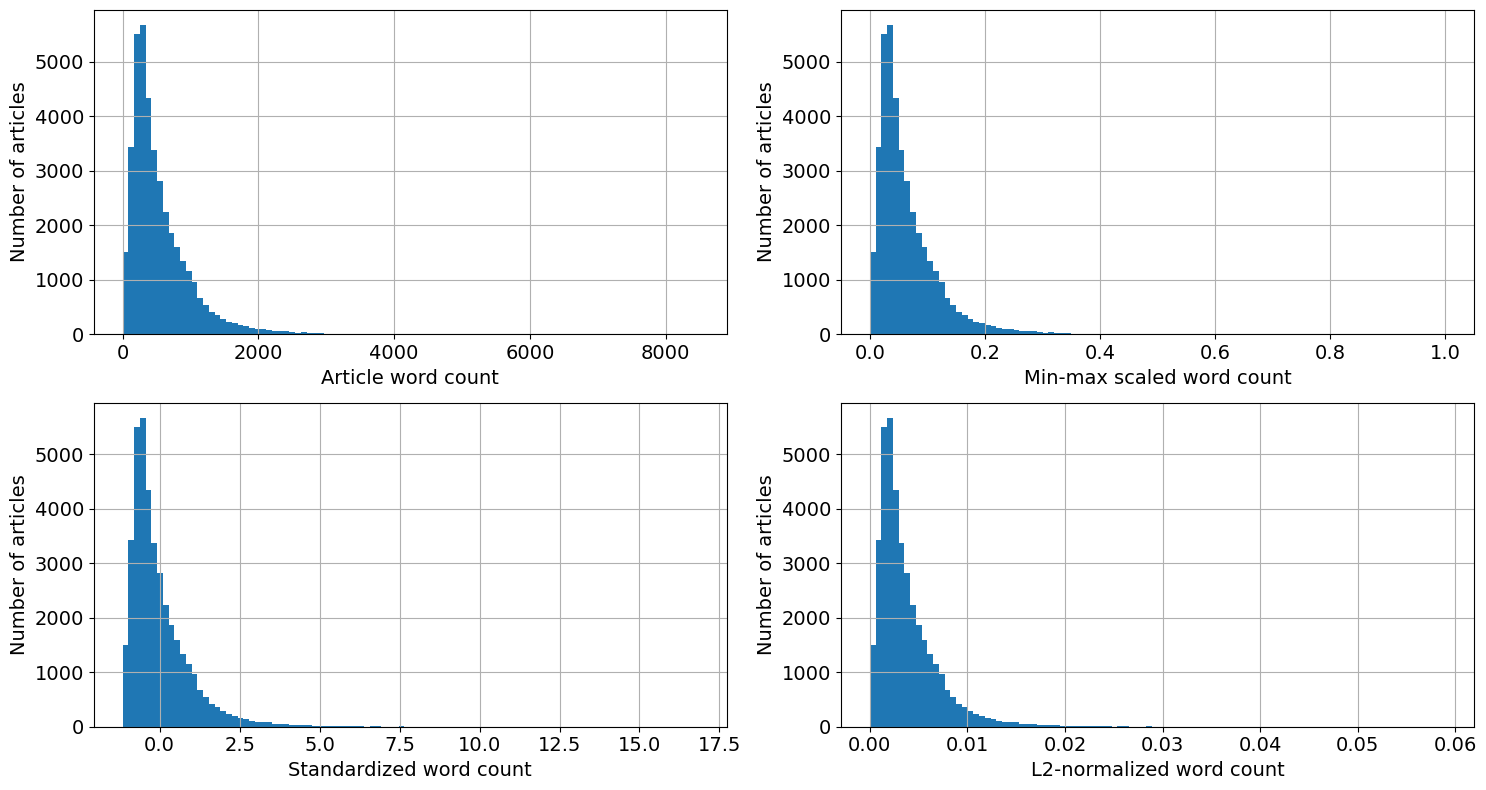

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 8))

news_df[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['min_max'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)


fig.tight_layout()

plt.show()

## Example of interaction features in prediction

In [29]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

features = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', 
       ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']

X = news_df[features]
y = news_df[[' shares']]

X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)

# Create train/test sets for both feature sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

# Train models and compare score on the two feature sets
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)

print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113275205
